In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading csv file  from Module 1

In [4]:
df = pd.read_csv('/home/user/Module1.csv')

## Added columns from last module:
### 1. vwap - daily volume weighted average price
### 2. Day_Perc_Change - % change of daily close price
### 3. Trend - Labelled the daily trends

In [5]:
df.head()

,Unnamed: 0,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,temp,vwap,Day_Perc_Change,Trend
0,375,2018-04-30,1018.58,1034.42,1038.37,1018.30,1.72,Apr,2018,Apr-2018,1018.5800,0.000000,Slight or No Change
1,376,2018-04-27,1031.45,1045.54,1051.69,1027.59,2.04,Apr,2018,Apr-2018,1025.5627,1.263523,Positive
2,377,2018-04-26,1043.31,1033.22,1052.02,1020.45,2.55,Apr,2018,Apr-2018,1032.7349,1.149845,Positive
3,378,2018-04-25,1022.99,1029.75,1036.07,1017.01,2.89,Apr,2018,Apr-2018,1029.6737,-1.947653,Negative
4,379,2018-04-24,1022.64,1059.20,1064.49,1012.86,6.41,Apr,2018,Apr-2018,1026.7855,-0.034213,Slight or No Change


In [6]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

## Converting dates to datetime format

In [9]:
df.Date = pd.to_datetime(df.Date)

In [10]:
df.dtypes

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity           float64
Month                            object
Year                              int64
temp                             object
vwap                            float64
Day_Perc_Change                 float64
Trend                            object
dtype: object

In [35]:
df.Date.dt.date

0      2018-04-30
1      2018-04-27
2      2018-04-26
3      2018-04-25
4      2018-04-24
          ...    
498    2019-09-09
499    2019-09-06
500    2019-09-05
501    2019-09-04
502    2019-09-03
Name: Date, Length: 503, dtype: object

## Plotting Daily close price

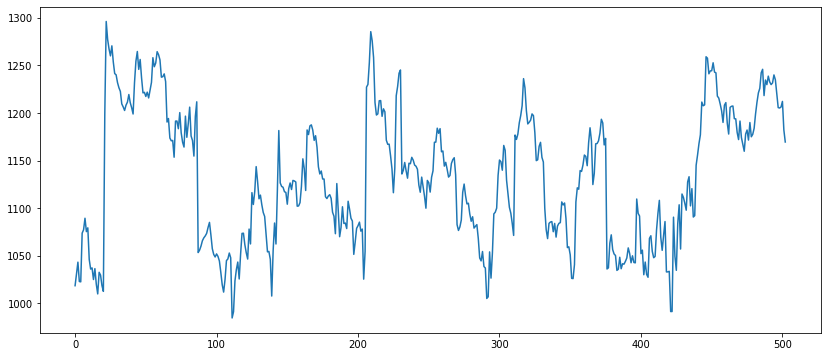

In [190]:
plt.figure(figsize = (14,6))
ax = plt.subplot(1,1,1)
ax.plot(df['Close Price'])

## Stem Plot

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

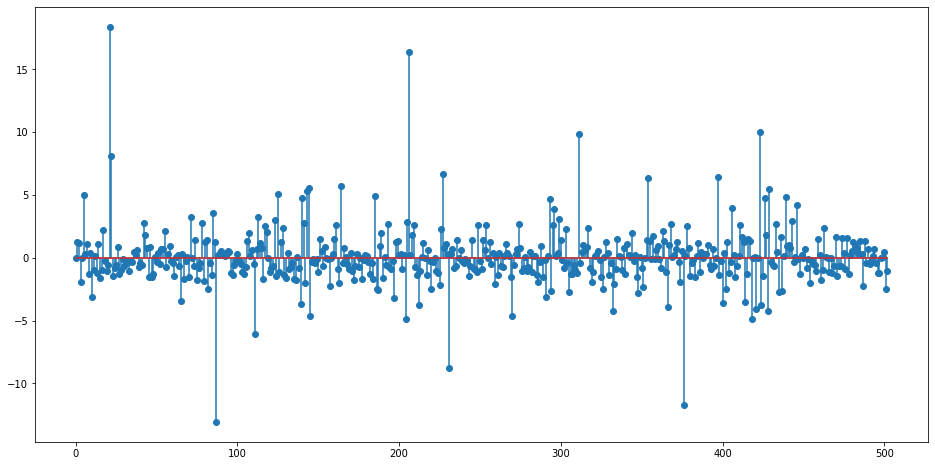

In [41]:
plt.figure(figsize = (16,8))
plt.stem(df['Day_Perc_Change'])

## Comparing Daily volume v/s Percentage change stem plot

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


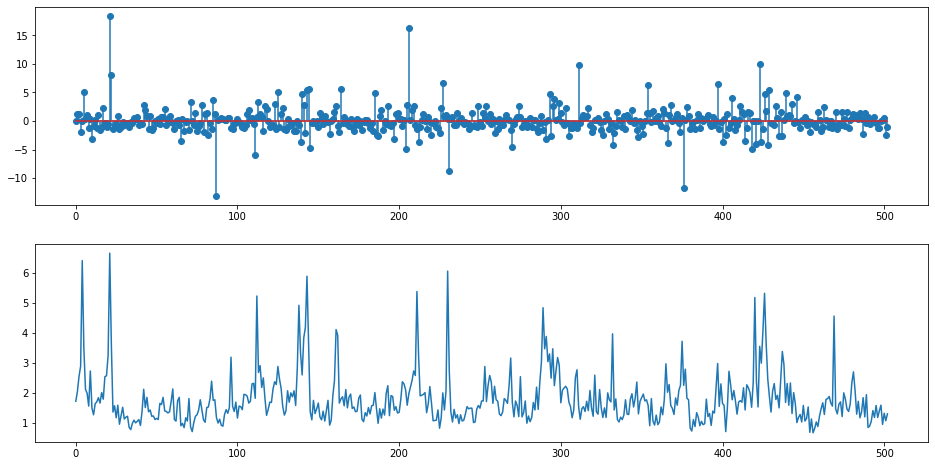

In [77]:
plt.figure(figsize = (16,8))
ax1 = plt.subplot(2,1,1)
ax1.stem(df['Day_Perc_Change'])
ax2 = plt.subplot(2,1,2)
ax2.plot(df['Total Traded Quantity'])

### Conclusion - Large movement of stocks when market goes bear or bullish

In [81]:
trends = df.Trend.value_counts()

In [84]:
trends = trends/sum(df['Trend'].value_counts())

In [94]:
import seaborn as sn

## Pie Plot of Trends

([<matplotlib.patches.Wedge at 0x7f67631acbe0>,
 [Text(0.5539618030318023, 0.9503295853448712, 'Slight or No Change'),
  Text(-1.002274826607983, 0.45326060048049394, 'Negative'),
  Text(-0.8282494784341491, -0.7238803778757649, 'Positive'),
  Text(0.05836989847516973, -1.0984502514688586, 'Slight Negative'),
  Text(0.7160891878267562, -0.8349947754792344, 'Slight Positive'),
  Text(0.9845895032211519, -0.49049312956118496, 'Among Top Gainers'),
  Text(1.0752911844211606, -0.23183802256346542, 'Among Top Losers'),
  Text(1.0974049732823183, -0.07551373792386612, 'Bull Run'),
  Text(1.0998069102228332, -0.020609711936497688, 'Bear Drop')],
 [Text(0.30216098347189213, 0.5183615920062933, '33.20%'),
  Text(-0.5466953599679907, 0.24723305480754212, '20.08%'),
  Text(-0.45177244278226303, -0.3948438424776899, '16.30%'),
  Text(0.03183812644100167, -0.5991546826193773, '12.52%'),
  Text(0.3905941024509579, -0.45545169571594596, '8.35%'),
  Text(0.53704881993881, -0.2675417070333736, '4.37%')

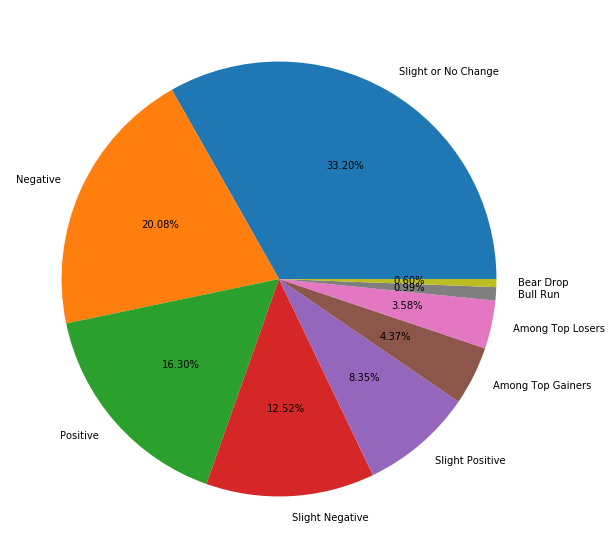

In [99]:
plt.figure(figsize=(10,10))
plt.pie(trends,labels=trends.index,autopct='%1.2f%%')

In [108]:
grp = df.groupby('Trend')['Total Traded Quantity']

In [124]:
lb = df.Trend.unique()

## Plotting bar plot for average v/s median values according to trends

[Text(0, 0, 'Slight or No Change'),
 Text(0, 0, 'Positive'),
 Text(0, 0, 'Negative'),
 Text(0, 0, 'Among Top Gainers'),
 Text(0, 0, 'Among Top Losers'),
 Text(0, 0, 'Slight Negative'),
 Text(0, 0, 'Bull Run'),
 Text(0, 0, 'Slight Positive'),
 Text(0, 0, 'Bear Drop')]

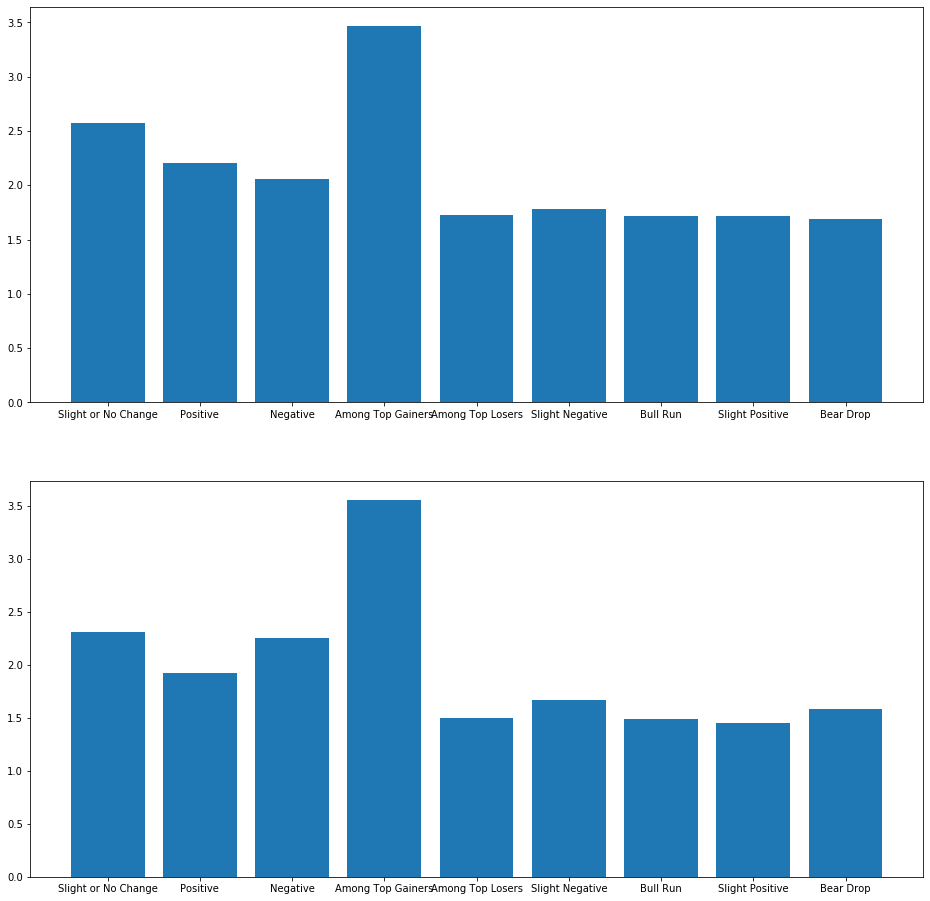

In [134]:
plt.figure(figsize = (16,16))
ax1 = plt.subplot(2,1,1)
ax1.bar(range(len(lb)),grp.mean())
ax1.set_xticks(range(len(lb)))
ax1.set_xticklabels(lb)
ax2 = plt.subplot(2,1,2)
ax2.bar(range(len(lb)),grp.median())
ax2.set_xticks(range(len(lb)))
ax2.set_xticklabels(lb)

## Histogram for daily return

(array([0.00277958, 0.        , 0.        , 0.00138979, 0.00138979,
        0.00555916, 0.01806728, 0.04864266, 0.24460311, 0.25016228,
        0.07782826, 0.02084686, 0.0138979 , 0.00694895, 0.00138979,
        0.        , 0.00277958, 0.        , 0.        , 0.        ,
        0.00138979, 0.00138979]),
 array([-13.070029, -11.639546, -10.209063,  -8.77858 ,  -7.348097,
         -5.917614,  -4.487131,  -3.056648,  -1.626165,  -0.195682,
          1.234801,   2.665284,   4.095767,   5.52625 ,   6.956733,
          8.387216,   9.817699,  11.248182,  12.678665,  14.109148,
         15.539631,  16.970114,  18.400597]),
 <a list of 22 Patch objects>)

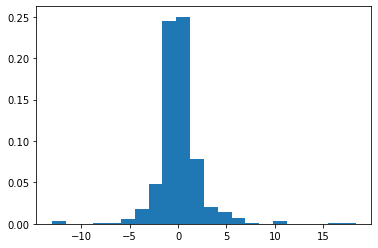

In [142]:
plt.hist(df['Day_Perc_Change'],bins = 22,density=True)

## Loading any 5 stocks

In [143]:
df1 = pd.read_csv('/home/user/Desktop/AXISBANK.csv')
df2 = pd.read_csv('/home/user/Desktop/CIPLA.csv')
df3 = pd.read_csv('/home/user/Desktop/GAIL.csv')
df4 = pd.read_csv('/home/user/Desktop/TCS.csv')
df5 = pd.read_csv('/home/user/Desktop/HDFC.csv')

In [147]:
dat = pd.DataFrame()

In [150]:
dat['AXISBANK'] = df1[df1.Series=='EQ']['Close Price']
dat['CIPLA'] = df2[df2.Series=='EQ']['Close Price']
dat['GAIL'] = df3[df3.Series=='EQ']['Close Price']
dat['HDFC'] = df5[df5.Series=='EQ']['Close Price']
dat['TCS'] = df4[df4.Series=='EQ']['Close Price']

In [160]:
dat2 = pd.DataFrame()
dat2['AXISBANK'] = dat.AXISBANK.pct_change()
dat2['CIPLA'] = dat.CIPLA.pct_change()
dat2['GAIL'] = dat.GAIL.pct_change()
dat2['HDFC'] = dat.HDFC.pct_change()
dat2['TCS'] = dat.TCS.pct_change()

In [163]:
dat2.fillna(0,inplace=True)

## Correlation analysis for percentage change of selected 5 stocks

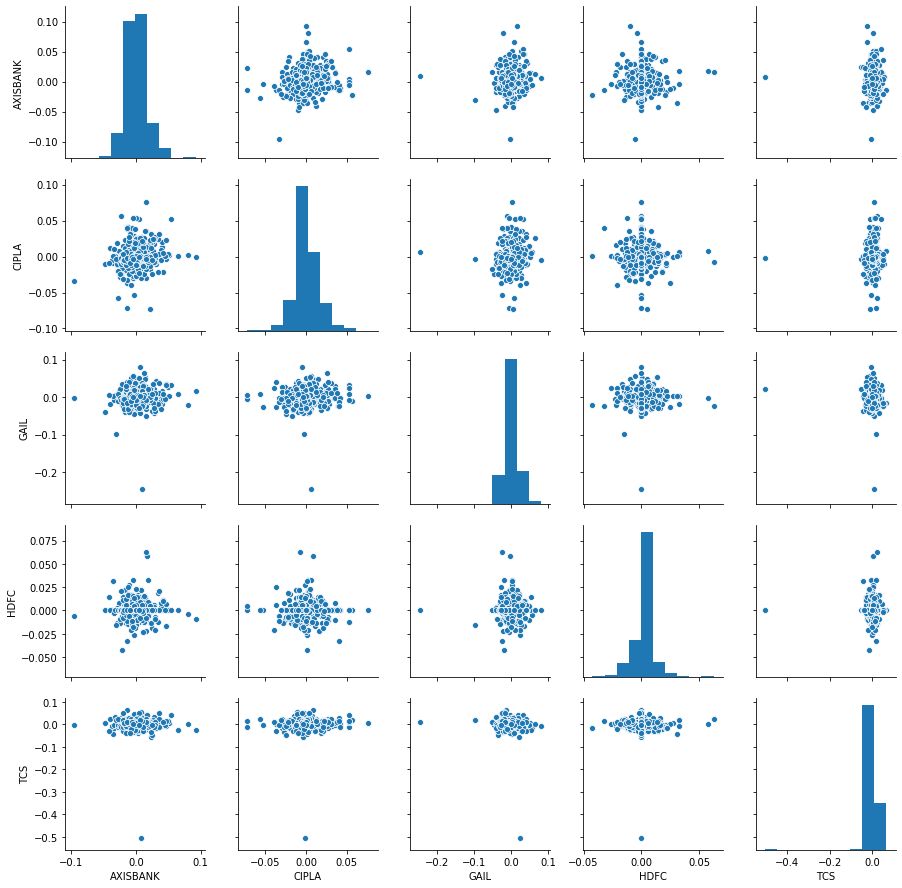

In [164]:
sn.pairplot(dat2)

## 7 day rolling average plot for axis bank stocks

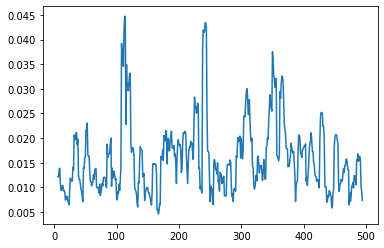

In [171]:
plt.plot(dat2.AXISBANK.rolling(7).std())

In [175]:
rm1 = df1['Average Price'].rolling(21).mean()

In [177]:
rm2 = df1['Average Price'].rolling(34).mean()

## 21 and 34 day moving averages for axis bank stocks

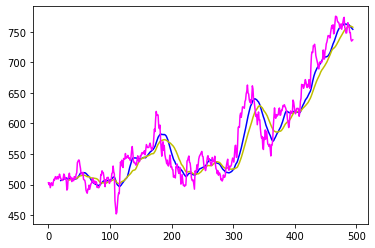

In [186]:
plt.plot(df1.index,rm1,'b')
plt.plot(df1.index,rm2,'y')
plt.plot(df1.index,df1['Average Price'],'magenta')

## Bollinger bands for axis bank stocks

In [187]:
mn = df1['Close Price'].rolling(14).mean()
stn = df1['Close Price'].rolling(14).std()
ub = mn+2*stn
lb = mn-2*stn

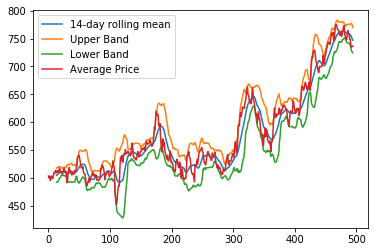

In [192]:
plt.plot(df1.index,mn)
plt.plot(df1.index,ub)
plt.plot(df1.index,lb)
plt.plot(df1.index,df1['Average Price'])
plt.legend(['14-day rolling mean','Upper Band','Lower Band','Average Price'])